In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsf-datasets/student_scores.csv
/kaggle/input/tsf-datasets/matches.csv
/kaggle/input/tsf-datasets/deliveries.csv
/kaggle/input/tsf-datasets/globalterrorismdb_0718dist.csv
/kaggle/input/tsf-datasets/india-news-headlines.csv
/kaggle/input/tsf-datasets/SampleSuperstore.csv
/kaggle/input/tsf-datasets/Iris.csv


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
sns.set_palette('colorblind')
sns.set_style('whitegrid')

In [122]:
df = pd.read_csv('../input/tsf-datasets/SampleSuperstore.csv')
df = df.drop('Country', axis = 1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [123]:
df['Discount (in %)'] = df['Discount']*100
df = df.drop('Discount', axis = 1)
df['Discount (in %)']  = df['Discount (in %)'].astype('int')
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Profit,Discount (in %)
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,41.9136,0
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,219.5820,0
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,6.8714,0
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,-383.0310,45
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,2.5164,20


In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976
Discount (in %),9994.0,15.620272,20.645197,0.000,0.00000,20.0000,20.000,80.000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Mode        9994 non-null   object 
 1   Segment          9994 non-null   object 
 2   City             9994 non-null   object 
 3   State            9994 non-null   object 
 4   Postal Code      9994 non-null   int64  
 5   Region           9994 non-null   object 
 6   Category         9994 non-null   object 
 7   Sub-Category     9994 non-null   object 
 8   Sales            9994 non-null   float64
 9   Quantity         9994 non-null   int64  
 10  Profit           9994 non-null   float64
 11  Discount (in %)  9994 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 937.1+ KB


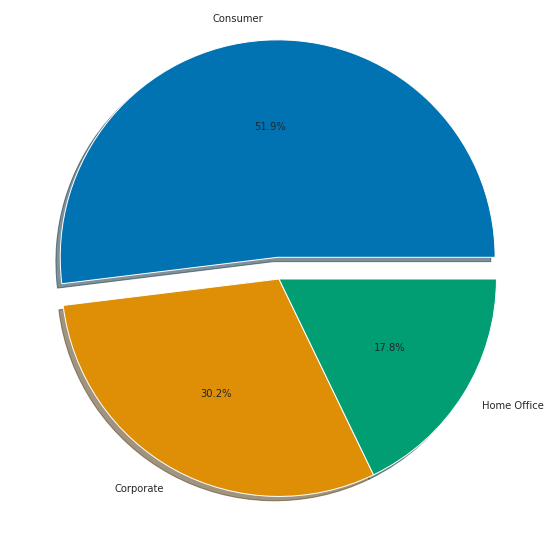

In [126]:
plt.figure(figsize = (10, 10))
explode = (0.1,0, 0)
plt.pie(df['Segment'].value_counts(), labels = df.Segment.unique(), autopct='%1.1f%%', explode = explode, shadow = True)
plt.show()

In [127]:
categorical_features = []
continous_features = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    elif df[col].dtype == 'float64':
        continous_features.append(col)
    
print(categorical_features) 
print(continous_features)

['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
['Sales', 'Profit']


In [128]:
categorical_features.remove('City')

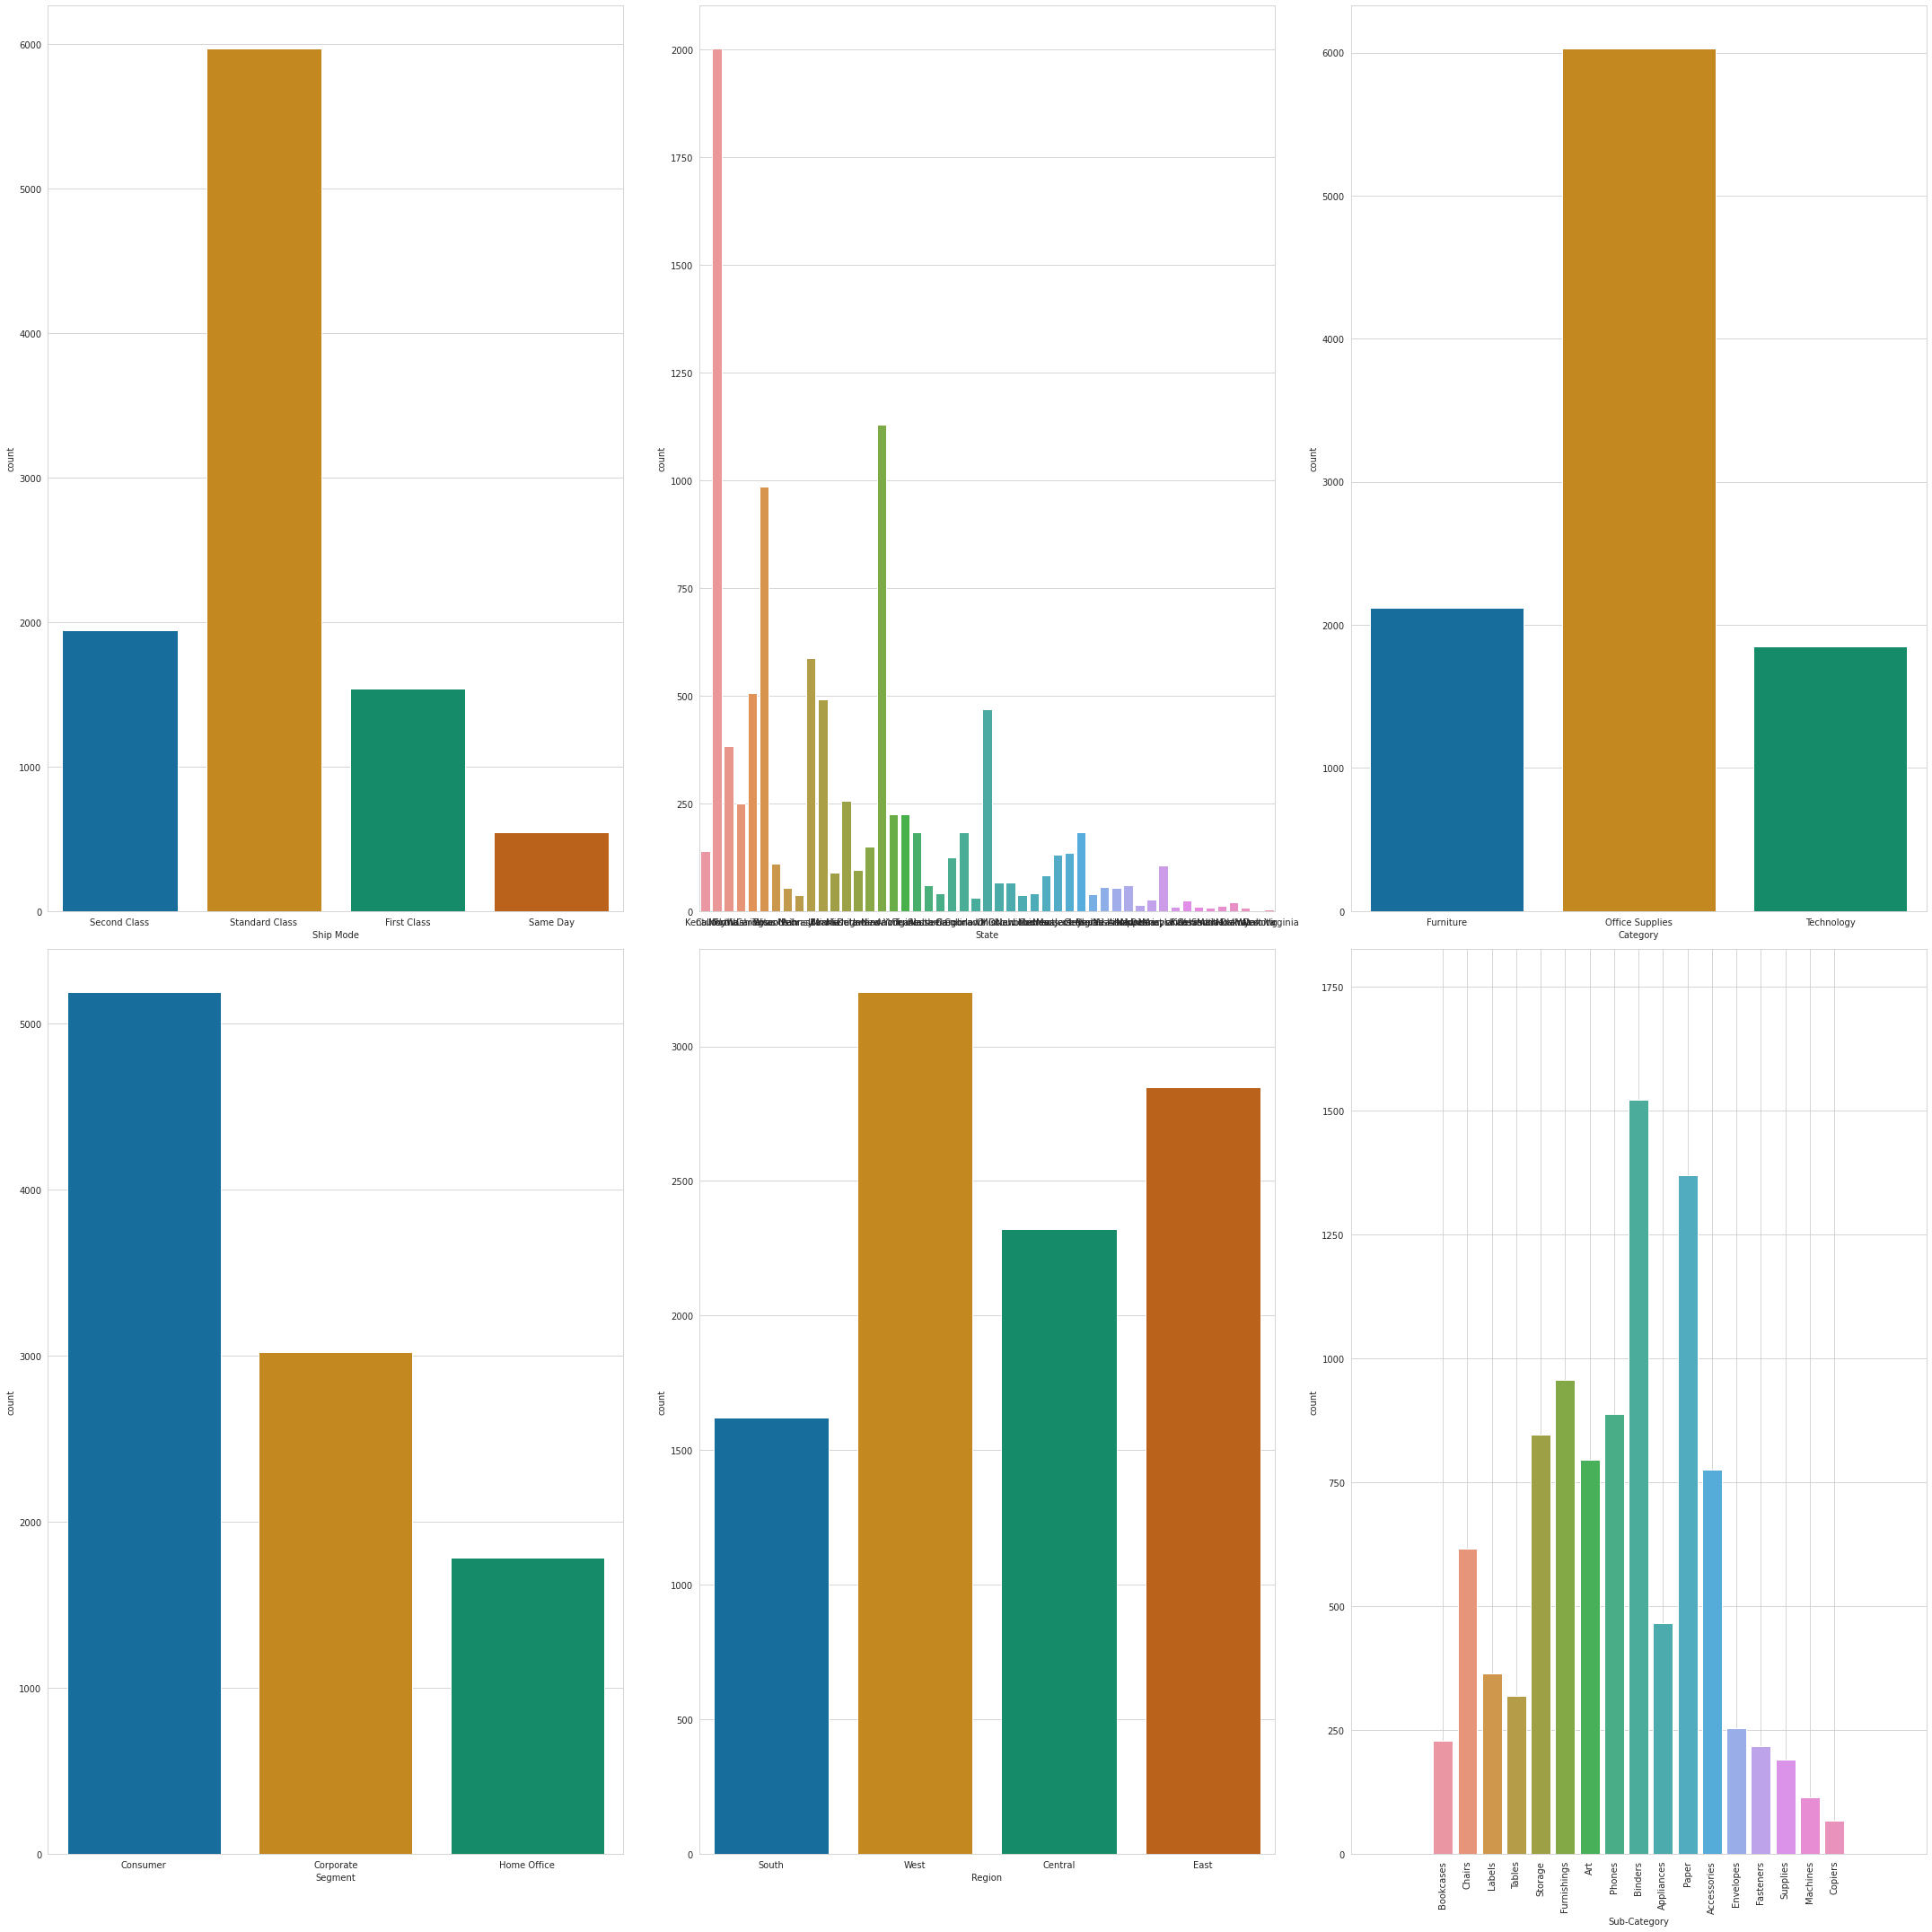

In [129]:
f, axes = plt.subplots(2,3, figsize = (30, 30))
for i, feature in enumerate(categorical_features):
    sns.countplot(data = df, x = feature, ax = axes[i%2, i//2])

plt.margins(0.2)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.grid(True)
plt.show()

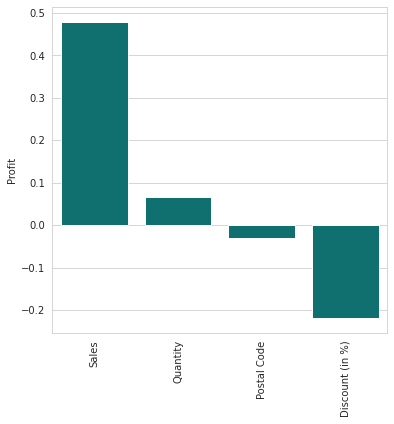

In [130]:
corr_df = df.corr()['Profit'].sort_values(ascending = False)[1:]
plt.figure(figsize = (6, 6))
sns.barplot(x = corr_df.index, y = corr_df, color = 'teal')
plt.xticks(rotation = 90)
plt.show()

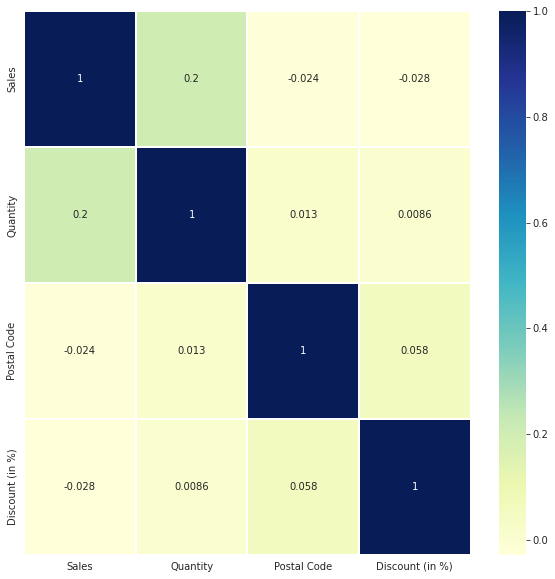

In [131]:
plt.figure(figsize = (10, 10))
cols = corr_df.index
sns.heatmap(df[cols].corr(), annot = True, linewidths = 0.4, cmap = 'YlGnBu')
plt.show()

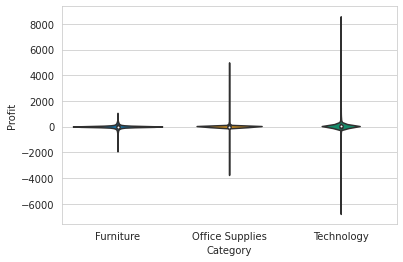

In [132]:
sns.violinplot(x = 'Category', y = 'Profit', data = df)
plt.show()

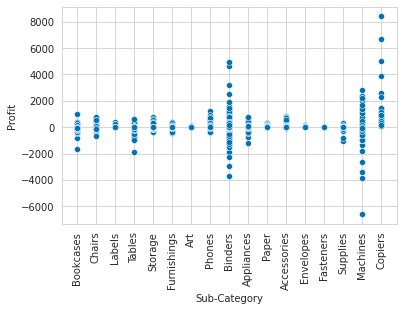

In [133]:
sns.scatterplot(x = 'Sub-Category', y = 'Profit', data = df)
plt.xticks(rotation = 90)
plt.show()

In [134]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical_features.append('City')
for col in categorical_features:
    le.fit(df[col])
    df[col] = le.transform(df[col])
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Profit,Discount (in %)
0,2,0,194,15,42420,2,0,4,261.9600,2,41.9136,0
1,2,0,194,15,42420,2,0,5,731.9400,3,219.5820,0
2,2,1,266,3,90036,3,1,10,14.6200,2,6.8714,0
3,3,0,153,8,33311,2,0,16,957.5775,5,-383.0310,45
4,3,0,153,8,33311,2,1,14,22.3680,2,2.5164,20
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2,0,295,8,33180,2,0,9,25.2480,3,4.1028,20
9990,3,0,104,3,92627,3,0,9,91.9600,2,15.6332,0
9991,3,0,104,3,92627,3,2,13,258.5760,2,19.3932,20
9992,3,0,104,3,92627,3,1,12,29.6000,4,13.3200,0


In [135]:
X = df.drop('Profit', axis = 1)
y = df['Profit']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

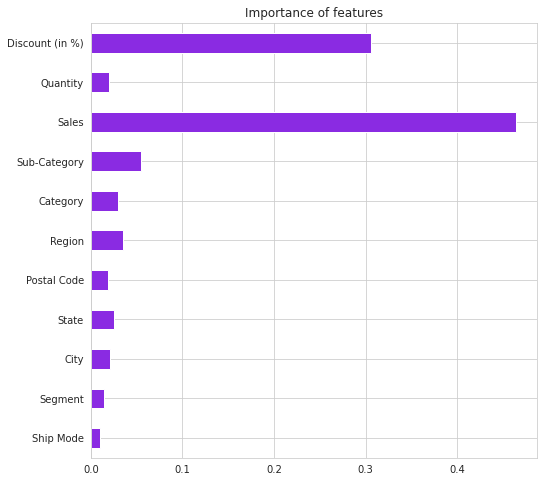

In [137]:
from sklearn.ensemble import ExtraTreesRegressor

reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
plt.figure(figsize = (8,8))
feat_importances.plot(kind='barh', color = 'blueviolet')
plt.title('Importance of features')
plt.show()

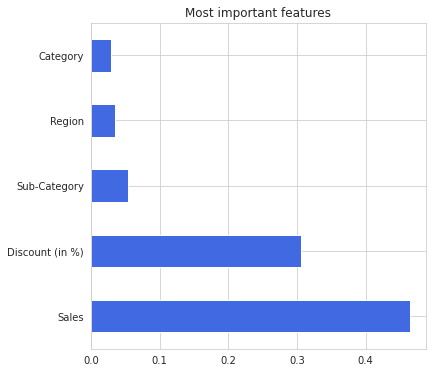

In [138]:
plt.figure(figsize = (6,6))
feat_importances.nlargest(5).plot(kind='barh', color = 'royalblue')
plt.title('Most important features')
plt.show()